In [4]:
import geopandas as gpd
import fiona
import json

# Read file from JSON
fp = open("BDD100K/val/b1c66a42-6f7d68ca.json","r")
fp = json.load(fp)

geofp = []

for row in fp["gps"]:
    temp = {"type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [row["longitude"], row["latitude"]]
  },
  "properties": {
    "timestamp": row["timestamp"],
    "altitude": row["altitude"],
    "speed": row["speed"],
    "vertical accuracy": row["vertical accuracy"],
    "horizontal accuracy": row["horizontal accuracy"]
  }}
    geofp.append(temp)

geofp = {"type": "FeatureCollection", "features": geofp}
        
geojsonfp = json.dumps(geofp)
with open('data.json', 'w') as f:
  f.write(geojsonfp)

# Enable GeoJSON driver
fiona.drvsupport.supported_drivers["GeoJSON"] = "r"

tripdata1 = gpd.read_file("data.json", enabled_drivers="GeoJSON")

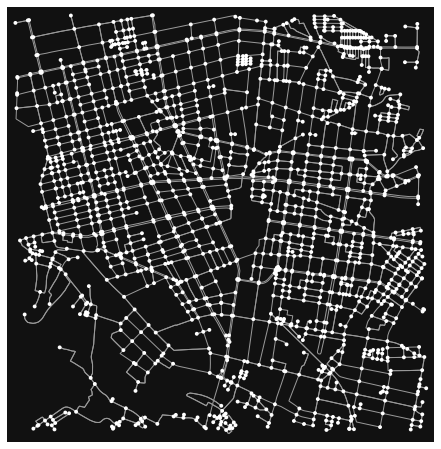

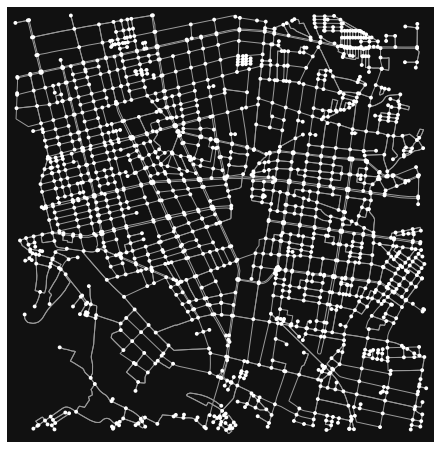

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
import osmnx as ox

S = ox.graph_from_address("Sendai, Minamimachi-dori, Chuo 3-chome, Aoba Ward, Sendai, Miyagi Prefecture, 980-0021, Japan",dist=1750, network_type='drive')
fig, ax = ox.plot_graph(S)
networknodes, networkedges = ox.graph_to_gdfs(S)
Snew = ox.graph_from_gdfs(networknodes, networkedges)
ox.plot_graph(Snew)

In [8]:
networknodes


,y,x,highway,street_count,geometry
osmid,,,,,
244879417,38.266126,140.871677,traffic_signals,4,POINT (140.87168 38.26613)
244879418,38.260102,140.875203,traffic_signals,4,POINT (140.87520 38.26010)
301789611,38.256070,140.873493,traffic_signals,4,POINT (140.87349 38.25607)
301789618,38.255104,140.875946,NaN,4,POINT (140.87595 38.25510)
301789634,38.252816,140.879493,traffic_signals,4,POINT (140.87949 38.25282)
...,...,...,...,...,...
9589950271,38.273236,140.869934,NaN,1,POINT (140.86993 38.27324)
9698420182,38.264530,140.892511,traffic_signals,3,POINT (140.89251 38.26453)
9729528560,38.268677,140.883699,NaN,3,POINT (140.88370 38.26868)


In [9]:
networkedges

osmid  \
u          v          key                                                      
244879417  1201390811 0                                            218028552   
           4025385190 0                                            461330966   
244879418  1201358483 0                                             30999231   
           1256397159 0                                            899682371   
301789611  1837893264 0                                            837910375   
...                                                                      ...   
9729528560 1231055156 0    [1058863104, 1058863106, 1058863108, 105886311...   
           1207439624 0                                            919627862   
9774670115 9774670116 0                                           1064299942   
           1200073388 0                                             61726473   
9774670116 9774670115 0                                           1064299942   

                           oneway     ref   name       highway maxspeed  \
u          v          key                                                 
244879417  1201390811 0      True      45   定禅寺通         trunk       60   
           4025385190 0      True  286;48  東二番丁通         trunk       60   
244879418  1201358483 0      True     NaN    青葉通      tertiary      NaN   
           1256397159 0      True     286  東二番丁通         trunk       60   
301789611  1837893264 0     False     NaN    NaN      tertiary      NaN   
...                           ...     ...    ...           ...      ...   
9729528560 1231055156 0     False     NaN   東六番丁      tertiary      NaN   
           1207439624 0     False     NaN   東六番丁      tertiary      NaN   
9774670115 9774670116 0     False     NaN    NaN   residential      NaN   
           1200073388 0      True     NaN   光善寺通  unclassified      NaN   
9774670116 9774670115 0     False     NaN    NaN   residential      NaN   

                          reversed   length  \
u          v          key                     
244879417  1201390811 0      False   17.586   
           4025385190 0      False   66.732   
244879418  1201358483 0      False   15.304   
           1256397159 0      False   94.102   
301789611  1837893264 0       True   11.727   
...                            ...      ...   
9729528560 1231055156 0      False  168.105   
           1207439624 0       True   52.581   
9774670115 9774670116 0      False   39.709   
           1200073388 0      False   79.575   
9774670116 9774670115 0       True   39.709   

                                                                    geometry  \
u          v          key                                                      
244879417  1201390811 0    LINESTRING (140.87168 38.26613, 140.87148 38.2...   
           4025385190 0    LINESTRING (140.87168 38.26613, 140.87178 38.2...   
244879418  1201358483 0    LINESTRING (140.87520 38.26010, 140.87503 38.2...   
           1256397159 0    LINESTRING (140.87520 38.26010, 140.87564 38.2...   
301789611  1837893264 0    LINESTRING (140.87349 38.25607, 140.87347 38.2...   
...                                                                      ...   
9729528560 1231055156 0    LINESTRING (140.88370 38.26868, 140.88369 38.2...   
           1207439624 0    LINESTRING (140.88370 38.26868, 140.88370 38.2...   
9774670115 9774670116 0    LINESTRING (140.87897 38.26999, 140.87941 38.2...   
           1200073388 0    LINESTRING (140.87897 38.26999, 140.87898 38.2...   
9774670116 9774670115 0    LINESTRING (140.87941 38.27008, 140.87897 38.2...   

                          lanes bridge tunnel  
u          v          key                      
244879417  1201390811 0     NaN    NaN    NaN  
           4025385190 0     NaN    NaN    NaN  
244879418  1201358483 0       4    NaN    NaN  
           1256397159 0     NaN    NaN    NaN  
301789611  1837893264 0     NaN    NaN    NaN  
...                         ...    ...    ...  
9729528560 123105

In [10]:
networkgdf = networknodes.append(networkedges)

/tmp/ipykernel_23160/2101132138.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  networkgdf = networknodes.append(networkedges)


In [11]:
networkgdf

,y,x,highway,street_count,geometry,osmid,oneway,ref,name,maxspeed,reversed,length,lanes,bridge,tunnel
244879417,38.266126,140.871677,traffic_signals,4.0,POINT (140.87168 38.26613),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244879418,38.260102,140.875203,traffic_signals,4.0,POINT (140.87520 38.26010),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301789611,38.256070,140.873493,traffic_signals,4.0,POINT (140.87349 38.25607),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301789618,38.255104,140.875946,NaN,4.0,POINT (140.87595 38.25510),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301789634,38.252816,140.879493,traffic_signals,4.0,POINT (140.87949 38.25282),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(9729528560, 1231055156, 0)",NaN,NaN,tertiary,NaN,"LINESTRING (140.88370 38.26868, 140.88369 38.2...","[1058863104, 1058863106, 1058863108, 105886311...",False,NaN,東六番丁,NaN,False,168.105,2,NaN,NaN
"(9729528560, 1207439624, 0)",NaN,NaN,tertiary,NaN,"LINESTRING (140.88370 38.26868, 140.88370 38.2...",919627862,False,NaN,東六番丁,NaN,True,52.581,2,NaN,NaN
"(9774670115, 9774670116, 0)",NaN,NaN,residential,NaN,"LINESTRING (140.87897 38.26999, 140.87941 38.2...",1064299942,False,NaN,NaN,NaN,False,39.709,NaN,NaN,NaN
"(9774670115, 1200073388, 0)",NaN,NaN,unclassified,NaN,"LINESTRING (140.87897 38.26999, 140.87898 38.2...",61726473,True,NaN,光善寺通,NaN,False,79.575,NaN,NaN,NaN


In [12]:
networkgdf.columns

Index(['y', 'x', 'highway', 'street_count', 'geometry', 'osmid', 'oneway',
       'ref', 'name', 'maxspeed', 'reversed', 'length', 'lanes', 'bridge',
       'tunnel'],
      dtype='object')

In [1]:
import networkx as nx
import osmnx as ox
import time
from shapely.geometry import Polygon
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as plt
import fiona

%matplotlib inline
ox.__version__

/home/gjgress/.local/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


'1.2.1'

In [2]:
S = ox.graph_from_address("Sendai, Minamimachi-dori, Chuo 3-chome, Aoba Ward, Sendai, Miyagi Prefecture, 980-0021, Japan",dist=1750, network_type='drive')
gdf_nodes, gdf_edges = ox.graph_to_gdfs(S)

In [3]:
# Enable KML driver
fiona.drvsupport.supported_drivers["KML"] = "rw"

# Read file from KML
fp = "history-2022-06-21.kml"
tripdata = gpd.read_file(fp, driver='KML')

In [4]:
from fmm import FastMapMatchConfig

In [5]:
from algorithms import fmm_bin

k = 8
radius = 0.003
gps_error = 0.0005

fmm_config = FastMapMatchConfig(k,radius,gps_error)

sim = fmm_bin.FMM(fmm_config)
sim.run(input_nodes = tripdata[tripdata.geom_type == 'Points'], input_edges = tripdata[tripdata.geom_type == 'LineString'], network_nodes = gdf_nodes, network_edges = gdf_edges)

pred_nodes, pred_edges = sim.results

/home/gjgress/G-RIPS-2022-Mitsubishi-A/Code/algorithms/fmm_bin.py:46: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, encoding=encoding)


[2022-06-28 16:47:57.195] [info] [network.cpp:72] Read network from file temp/network_edges.shp
Nodes 1691 edges 3949
[2022-06-28 16:47:57.210] [info] [network.cpp:170] Number of edges 3949 nodes 1691
[2022-06-28 16:47:57.210] [info] [network.cpp:171] Field index: id 14 source 0 target 1
[2022-06-28 16:47:57.212] [info] [network.cpp:174] Read network done.
[2022-06-28 16:47:57.213] [info] [network_graph.cpp:17] Construct graph from network edges start
[2022-06-28 16:47:57.213] [info] [network_graph.cpp:30] Graph nodes 1691 edges 3949
[2022-06-28 16:47:57.213] [info] [network_graph.cpp:31] Construct graph from network edges end
[2022-06-28 16:47:57.213] [info] [ubodt_gen_algorithm.cpp:76] Start to generate UBODT with delta 0.02
[2022-06-28 16:47:57.213] [info] [ubodt_gen_algorithm.cpp:77] Output format csv
[2022-06-28 16:47:57.314] [info] [ubodt_gen_algorithm.cpp:105] Progress 169 / 1691
[2022-06-28 16:47:57.422] [info] [ubodt_gen_algorithm.cpp:105] Progress 338 / 1691
[2022-06-28 16:47

/home/gjgress/G-RIPS-2022-Mitsubishi-A/Code/algorithms/fmm_bin.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.input_data = input_nodes.append(input_edges)


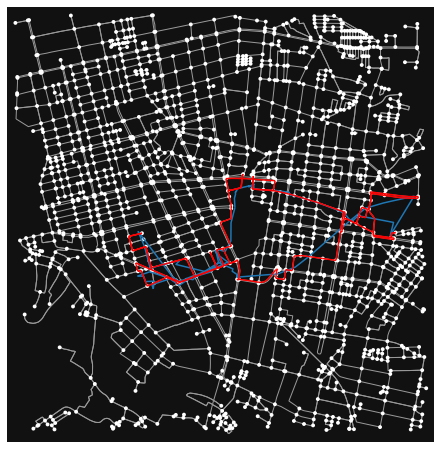

In [6]:
sim.plot()

pred_edges.to_csv("result.csv",sep=";",index=False)